In [34]:
from rich.pretty import pprint
import seaborn as sns

## The ToySGD Benchmark
Let's take a look at toy SGD. This is a toy benchmark for control of SGD on simple functions. First, let's make in instance of the benchmark:

In [35]:
from dacbench.benchmarks import ToySGDBenchmark
bench = ToySGDBenchmark()

Now let's take a look at the elements of the config in this benchmark:

In [36]:
pprint(list(bench.config.keys()))

[
│   'config_space',
│   'observation_space_class',
│   'observation_space_type',
│   'observation_space_args',
│   'reward_range',
│   'cutoff',
│   'seed',
│   'multi_agent',
│   'batch_size',
│   'instance_set_path',
│   'test_set_path',
│   'benchmark_info'
]

The 'benchmark_info' tells us some things about this benchmark already:

In [37]:
pprint(bench.config["benchmark_info"])

{
│   'identifier': 'toy_sgd',
│   'name': 'Learning Rate and Momentum Adaption for SGD on Toy Functions',
│   'reward': 'Negative Log Regret',
│   'state_description': ['Remaining Budget', 'Gradient', 'Current Learning Rate', 'Current Momentum'],
│   'action_description': ['Log Learning Rate', 'Log Momentum']
}

The 'config_space' specifies which actions are taken, i.e. which hyperparameters are configured. We can see that two floats, the "log_learning_rate" and the "log_momentum" are configured

In [38]:
pprint(bench.config["config_space"])

Configuration space object:
  Hyperparameters:
│   0_log_learning_rate, Type: UniformFloat, Range: [-10.0, 0.0], Default: -5.0
│   1_log_momentum, Type: UniformFloat, Range: [-10.0, 0.0], Default: -5.0

The reward in this task has the following reward range:

In [39]:
pprint(bench.config["reward_range"])

(-inf, inf)

Finally, the cutoff shows how many steps of the sequence are necessary for solution:

In [40]:
pprint(bench.config["cutoff"])

10

The config also contains some standard keys like the seed, instance set, multi agent mode or observation space config. The observation space usually does not need to be configured at all while the seed should be varied between runs. Multi agent mode has its own example which better shows how it works. 'batch_size' is benchmark-specific: it determines the batch size, i.e. the number of parallel function evaluations used to compute the gradient.

## ToySGD Instances
Now let's take a look at how a toy SGD instance looks. To do so, we first read the default instance set and look at its first element:

In [41]:
pprint(bench.config["instance_set_path"])
bench.read_instance_set()
pprint(bench.config.instance_set[0])
pprint(f"Function parameter a: {bench.config.instance_set[0].function.a}")
pprint(f"Function parameter b: {bench.config.instance_set[0].function.b}")

'toysgd_default.csv'

ToySGDInstance(function=<dacbench.envs.env_utils.toy_functions.Polynomial object at 0x30d470c40>)

'Function parameter a: 0.9000827312095951'

'Function parameter b: 0.7843515111599606'

As you can see, the instance contains only a 'function' which is the one to find the minimum of.

'Function evaluated at 0: 0.9000827312095951'

'Function derivative evaluated at 0: 0.7843515111599606'

<Axes: >

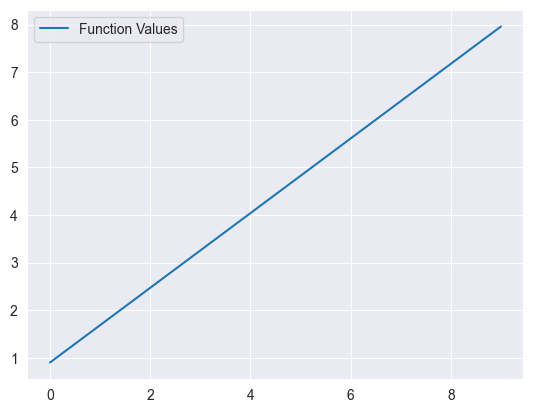

In [42]:
pprint(f"Function evaluated at 0: {bench.config.instance_set[0].function(0)}")
pprint(f"Function derivative evaluated at 0: {bench.config.instance_set[0].function.deriv(0)}")
values_f1 = [bench.config.instance_set[0].function(i) for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
sns.lineplot(x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], y=values_f1, label="Function Values")

The available functions for these instances are:
- sigmoid
- logarithmic
- quadratic
- polynomial

## Running ToySGD
Lastly, let's look at the toy SGD benchmark in action. The state is a dictionary initialized at 0 for most values:

In [43]:
env = bench.get_environment()
pprint(env.reset())

(
│   {
│   │   'remaining_budget': 10,
│   │   'gradient': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
│   │   'learning_rate': 0,
│   │   'momentum': 0
│   },
│   {}
)

If we take a step, we see the updated budget, gradients and last actions:

In [44]:
action = env.action_space.sample()
state, reward, terminated, truncated, info = env.step(action)
pprint(state)

{
│   'remaining_budget': 9,
│   'gradient': array([0.74900528, 0.74900528, 0.74900528, 0.74900528, 0.74900528,
│      0.74900528, 0.74900528, 0.74900528, 0.74900528, 0.74900528,
│      0.74900528, 0.74900528, 0.74900528, 0.74900528, 0.74900528,
│      0.74900528]),
│   'learning_rate': 4.0527022149123095e-06,
│   'momentum': 8.571989430876476e-09
}

Furthermore, we also get a reward and termination and truncation signals. Truncation will be set to true after the number of steps exceeds the cutoff.

In [45]:
pprint(f"Reward {reward}")
pprint(f"Terminated {terminated}")
pprint(f"Truncated {truncated}")

'Reward -0.22321375008524214'

'Terminated False'

'Truncated False'